In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D
import cv2
import os
import glob

In [2]:
folder=r'C:\Users\pt708\OneDrive\Desktop\test_set'

In [3]:
from pathlib import Path

In [4]:
cat_images = glob.glob(os.path.join(folder, r'C:\Users\pt708\OneDrive\Desktop\test_set\cats', '*.jpg'))
dog_images=glob.glob(os.path.join(folder, r'C:\Users\pt708\OneDrive\Desktop\test_set\dogs', '*.jpg'))

In [5]:
dog_images[:5]

['C:\\Users\\pt708\\OneDrive\\Desktop\\test_set\\dogs\\dog.4001.jpg',
 'C:\\Users\\pt708\\OneDrive\\Desktop\\test_set\\dogs\\dog.4002.jpg',
 'C:\\Users\\pt708\\OneDrive\\Desktop\\test_set\\dogs\\dog.4003.jpg',
 'C:\\Users\\pt708\\OneDrive\\Desktop\\test_set\\dogs\\dog.4004.jpg',
 'C:\\Users\\pt708\\OneDrive\\Desktop\\test_set\\dogs\\dog.4005.jpg']

In [7]:
dog=list(glob.glob(os.path.join(folder, r'C:\Users\pt708\OneDrive\Desktop\test_set\dogs', '*.jpg')))

In [8]:
dog[:5]

['C:\\Users\\pt708\\OneDrive\\Desktop\\test_set\\dogs\\dog.4001.jpg',
 'C:\\Users\\pt708\\OneDrive\\Desktop\\test_set\\dogs\\dog.4002.jpg',
 'C:\\Users\\pt708\\OneDrive\\Desktop\\test_set\\dogs\\dog.4003.jpg',
 'C:\\Users\\pt708\\OneDrive\\Desktop\\test_set\\dogs\\dog.4004.jpg',
 'C:\\Users\\pt708\\OneDrive\\Desktop\\test_set\\dogs\\dog.4005.jpg']

In [9]:
cat=glob.glob(os.path.join(folder, r'C:\Users\pt708\OneDrive\Desktop\test_set\cats', '*.jpg'))

In [10]:
cat[:5]

['C:\\Users\\pt708\\OneDrive\\Desktop\\test_set\\cats\\cat.4001.jpg',
 'C:\\Users\\pt708\\OneDrive\\Desktop\\test_set\\cats\\cat.4002.jpg',
 'C:\\Users\\pt708\\OneDrive\\Desktop\\test_set\\cats\\cat.4003.jpg',
 'C:\\Users\\pt708\\OneDrive\\Desktop\\test_set\\cats\\cat.4004.jpg',
 'C:\\Users\\pt708\\OneDrive\\Desktop\\test_set\\cats\\cat.4005.jpg']

In [11]:
import PIL

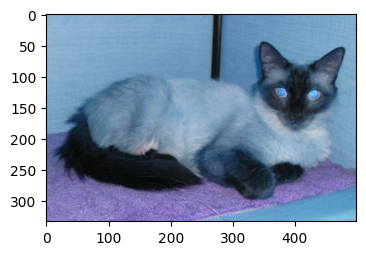

In [12]:
plt.figure(figsize=(4,4))
imgo=cv2.imread(str(cat[18]))
plt.imshow(imgo)

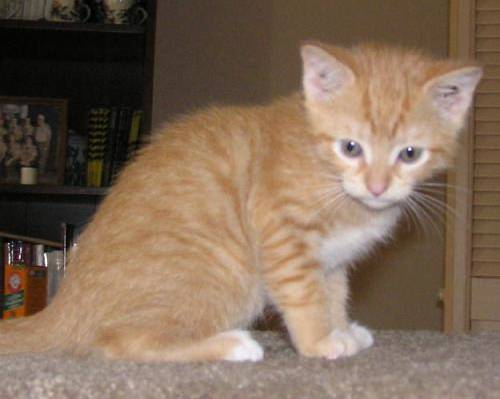

In [13]:
PIL.Image.open(str(cat[2]))

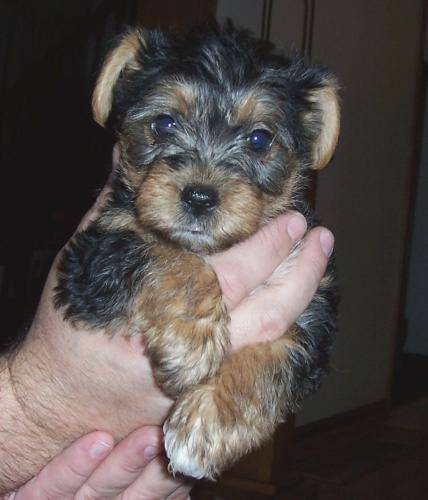

In [14]:
PIL.Image.open(str(dog[1]))

In [15]:
classification_images={
    'cat':glob.glob(os.path.join(folder, r'C:\Users\pt708\OneDrive\Desktop\test_set\cats', '*.jpg')),
    'dog':glob.glob(os.path.join(folder, r'C:\Users\pt708\OneDrive\Desktop\test_set\dogs', '*.jpg'))
}

In [16]:
pet_label={
    'cat':0,
    'dog':1,
}

In [17]:
pet_label

{'cat': 0, 'dog': 1}

In [18]:
classification_images['cat'][0]

'C:\\Users\\pt708\\OneDrive\\Desktop\\test_set\\cats\\cat.4001.jpg'

In [19]:
img=cv2.imread(classification_images['cat'][0])
img.shape

(415, 498, 3)

In [20]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [21]:
x,y=[],[]
for pet_name,images in classification_images.items():
    for image in images:
        img=cv2.imread(str(image))
        resize_image=cv2.resize(img,(180,180))
        x.append(resize_image)
        y.append(pet_label[pet_name])

In [22]:
y[:5]

[0, 0, 0, 0, 0]

In [23]:
x=np.array(x)
y=np.array(y)

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [33]:
x_train/255
x_test/255

array([[[[0.23137255, 0.2745098 , 0.25098039],
         [0.21176471, 0.29019608, 0.25882353],
         [0.32941176, 0.43921569, 0.40392157],
         ...,
         [0.45882353, 0.57254902, 0.63137255],
         [0.49411765, 0.60784314, 0.6627451 ],
         [0.4627451 , 0.58039216, 0.62352941]],

        [[0.20392157, 0.25098039, 0.22745098],
         [0.12156863, 0.18823529, 0.16078431],
         [0.39215686, 0.49019608, 0.45882353],
         ...,
         [0.4627451 , 0.57254902, 0.63921569],
         [0.50980392, 0.62352941, 0.67843137],
         [0.39215686, 0.50980392, 0.55294118]],

        [[0.19607843, 0.23921569, 0.22745098],
         [0.12941176, 0.18823529, 0.17254902],
         [0.20392157, 0.29019608, 0.27058824],
         ...,
         [0.43529412, 0.55294118, 0.61960784],
         [0.47843137, 0.59607843, 0.65882353],
         [0.42745098, 0.55294118, 0.60392157]],

        ...,

        [[0.38431373, 0.39215686, 0.39607843],
         [0.39215686, 0.4       , 0.40392157]

In [29]:
from tensorflow.keras import layers, models

cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(180,180,3)),
    layers.MaxPooling2D(pool_size=(2,2)),  
    layers.Conv2D(filters=94, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),  
    layers.Dense(64, activation='relu'),
    layers.Dense(84, activation='softmax')
])

cnn.summary()  


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 178, 178, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 89, 89, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 87, 87, 94)          │          54,238 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 43, 43, 94)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 173806)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │      11,123,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 84)                  │           5,460 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,185,138 (42.67 MB)

 Trainable params: 11,185,138 (42.67 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.4632 - loss: 78.4190
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.6592 - loss: 0.6058
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.8063 - loss: 0.4116
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9072 - loss: 0.2253
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9606 - loss: 0.1425


In [32]:
cnn.predict(x_train)

51/51 ━━━━━━━━━━━━━━━━━━━━ 19s 318ms/step


array([[1.6932799e-11, 1.1319017e-13, 3.2704880e-11, ..., 1.0273113e-03,
        4.3493255e-06, 2.2205089e-10],
       [4.3680419e-21, 5.1630492e-23, 2.0871041e-22, ..., 1.6085626e-06,
        8.8016494e-10, 8.1015470e-22],
       [3.3760490e-29, 3.0026346e-25, 4.1482229e-23, ..., 3.7371161e-14,
        1.1438052e-13, 5.0629925e-27],
       ...,
       [3.0047217e-21, 3.1911168e-18, 6.1594352e-21, ..., 9.8965209e-08,
        9.3345642e-10, 2.4251061e-21],
       [3.1324409e-20, 4.3321391e-21, 7.5291905e-11, ..., 1.2794446e-10,
        3.0273222e-09, 1.5531653e-17],
       [1.7472015e-21, 3.5752756e-20, 4.3091571e-14, ..., 2.1001965e-09,
        4.4058082e-12, 8.4479279e-19]], dtype=float32)